In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
hartree2kcal=627.5094740631

In [2]:
df=pd.read_pickle("minima_5z")
crs=pd.read_pickle("corrections5z")
pcxdf=pd.read_pickle("pcX23")
pcx_crs=pd.read_pickle("pcX_corrections")

In [3]:
pcxdf

,BF@COe,BF@COm,BFe,BFm,CO@BFe,CO@BFm,CO@NNe,CO@NNm,COe,COm,NN@COe,NN@COm,NNe,NNm,basis set,nAO,energy_MAE,rad_MAE,eMAE_corr
0,-124.156580,2.35483,-124.162432,2.35348,-112.785317,2.08324,-112.781076,2.08391,-112.786616,2.08272,-108.989017,2.01382,-108.989064,2.01389,pcX-2,90,0.003184,0.000783,0.001749
1,-124.168734,2.35201,-124.168895,2.35193,-112.792393,2.08230,-112.792287,2.08224,-112.792491,2.08218,-108.996335,2.01342,-108.996354,2.01335,pcX-3,168,0.000120,0.000083,0.000060


In [4]:
df.sort_values("nAO",inplace=True)
df

,BF@COe,BF@COm,BFe,BFm,CO@BFe,CO@BFm,CO@NNe,CO@NNm,COe,COm,NN@COe,NN@COm,NNe,NNm,basis set,energy_MAE,nAO,rad_MAE
4,-123.652305,2.13820,-124.156060,2.35927,-112.277758,1.97963,-112.313178,1.95836,-112.781813,2.08712,-108.506044,1.93577,-108.986557,2.01655,cc-pVTZ,0.489239,60,0.134525
3,-124.065701,2.34229,-124.162442,2.36062,-112.681261,2.09133,-112.693567,2.07844,-112.787152,2.08435,-108.898157,2.01042,-108.991419,2.01456,def2-TZVP,0.097370,62,0.008840
6,-124.134118,2.35566,-124.156825,2.35696,-112.761016,2.09039,-112.761980,2.08355,-112.782879,2.08512,-108.967949,2.01677,-108.987698,2.01451,cc-pCVTZ,0.021305,86,0.002600
8,-124.163301,2.35482,-124.164834,2.35976,-112.784525,2.08917,-112.787579,2.08345,-112.789415,2.08411,-108.991565,2.01554,-108.993655,2.01422,ccpcvTQZmix,0.002588,102,0.002995
5,-124.148394,2.35147,-124.166292,2.35324,-112.755719,2.08031,-112.770599,2.08115,-112.790626,2.08246,-108.970897,2.01162,-108.994470,2.01366,cc-pVQZ,0.024101,110,0.001817
2,-124.154123,2.35008,-124.168406,2.35281,-112.784762,2.08562,-112.781751,2.08307,-112.792055,2.08231,-108.988121,2.01540,-108.995734,2.01340,def2-QZVPP,0.009873,114,0.002200
1,-124.161934,2.35195,-124.168016,2.35167,-112.781655,2.08292,-112.786205,2.08165,-112.791694,2.08206,-108.988587,2.01329,-108.995599,2.01325,pC3,0.007155,128,0.000397
7,-124.164032,2.35364,-124.166507,2.35268,-112.789480,2.08272,-112.788615,2.08294,-112.790888,2.08223,-108.993876,2.01332,-108.994710,2.01356,cc-pVCQZ,0.001747,168,0.000600
0,-124.160390,2.35174,-124.168781,2.35211,-112.779840,2.08053,-112.783413,2.08171,-112.792412,2.08215,-108.986424,2.01236,-108.996188,2.01333,cc-pV5Z,0.009931,182,0.000850
0,-124.168697,2.35186,-124.169042,2.35190,-112.791840,2.08208,-112.792254,2.08209,-112.792615,2.08207,-108.996019,2.01331,-108.996523,2.01327,pC4,0.000496,218,0.000027


In [5]:
crs.sort_values("nAO",inplace=True)
crs

,basis,corrBF@CO,corrCO@BF,corrCO@NN,corrNN@CO,nAO
0,cc-pVTZ,0.658558,0.751309,0.691587,0.716186,60
1,def2-TZVP,0.104681,0.112337,0.105343,0.104278,62
2,cc-pCVTZ,0.024075,0.026383,0.026665,0.024913,86
8,ccpcvTQZmix,0.002551,0.002812,0.003689,0.002615,102
3,cc-pVQZ,0.019580,0.044375,0.024165,0.030110,110
4,def2-QZVPP,0.014188,0.008618,0.011485,0.009444,114
5,pC3,0.005758,0.011840,0.005684,0.008054,128
6,cc-pCVQZ,0.002562,0.002802,0.003657,0.002580,168
9,cc-pV5Z,0.008889,0.015282,0.010215,0.011982,182
7,pC4,0.000353,0.000798,0.000359,0.000476,218


In [6]:
#df['energy_MAE']=(df['BF@COe']+df['CO@BFe']+df['CO@NNe']+df['NN@COe']-2*df['COe']-df['NNe']-df['BFe'])/4
#df['rad_MAE']=(abs(df['BF@COm']-df['BFm'])+abs(df['CO@BFm']-df['COm'])+
 #              abs(df['CO@NNm']-df['COm'])+abs(df['NN@COm']-df['NNm']))/4

In [7]:
#pcxdf['energy_MAE']=(pcxdf['BF@COe']+pcxdf['CO@BFe']+pcxdf['CO@NNe']+pcxdf['NN@COe']-
#                     2*pcxdf['COe']-pcxdf['NNe']-pcxdf['BFe'])/4
#pcxdf['rad_MAE']=(abs(pcxdf['BF@COm']-pcxdf['BFm'])+abs(pcxdf['CO@BFm']-pcxdf['COm'])+
#               abs(pcxdf['CO@NNm']-pcxdf['COm'])+abs(pcxdf['NN@COm']-pcxdf['NNm']))/4
#pcxdf.to_pickle("pcX23")

In [8]:
#pcxdf['eMAE_corr']=(abs(pcxdf['BF@COe']-pcxdf['BFe']-pcx_crs['corrBF@CO'])+
#                     abs(pcxdf['CO@BFe']-pcxdf['COe']-pcx_crs['corrCO@BF'])+
#                    abs(pcxdf['CO@NNe']-pcxdf['COe']-pcx_crs['corrCO@NN'])+
#                     abs(pcxdf['NN@COe']-pcxdf['NNe']-pcx_crs['corrNN@CO']))/4

In [9]:
#df.to_pickle("minima_5z")

In [10]:
alchs=["BF@CO","CO@BF","CO@NN","NN@CO"]
(np.asarray(df["BF@COe"])-np.asarray(df["BFe"]), -np.asarray(crs["corrBF@CO"]),
np.asarray(df["BF@COe"])-np.asarray(crs["corrBF@CO"])-np.asarray(df["BFe"]))

(array([5.03754698e-01, 9.67412707e-02, 2.27068472e-02, 1.53326198e-03,
        1.78979123e-02, 1.42833473e-02, 6.08204651e-03, 2.47510516e-03,
        8.39015074e-03, 3.45331547e-04]),
 array([-6.58557856e-01, -1.04681301e-01, -2.40746073e-02, -2.55063392e-03,
        -1.95796536e-02, -1.41882129e-02, -5.75763213e-03, -2.56195803e-03,
        -8.88917687e-03, -3.53483773e-04]),
 array([-1.54803158e-01, -7.94002983e-03, -1.36776004e-03, -1.01737194e-03,
        -1.68174132e-03,  9.51343986e-05,  3.24414381e-04, -8.68528709e-05,
        -4.99026138e-04, -8.15222677e-06]))

In [11]:
q=[]
for al in alchs:
    q.append(abs(np.asarray(df["{}e".format(al[:2])])-
              np.asarray(df["{}e".format(al)])+np.asarray(crs["corr{}".format(al)])))

In [12]:
q=[]
for al in alchs:
    q.append(abs(np.asarray(df["{}e".format(al[:2])])-
              np.asarray(df["{}e".format(al)])+np.asarray(crs["corr{}".format(al)])))
q

[array([1.54803158e-01, 7.94002983e-03, 1.36776004e-03, 1.01737194e-03,
        1.68174132e-03, 9.51343986e-05, 3.24414381e-04, 8.68528709e-05,
        4.99026138e-04, 8.15222677e-06]),
 array([2.47253997e-01, 6.44574366e-03, 4.51962003e-03, 2.07852171e-03,
        9.46745915e-03, 1.32410398e-03, 1.80065539e-03, 1.39431149e-03,
        2.71035408e-03, 2.23880812e-05]),
 array([2.22952858e-01, 1.17579577e-02, 5.76549556e-03, 1.85258790e-03,
        4.13749676e-03, 1.18025590e-03, 1.94825768e-04, 1.38379575e-03,
        1.21693577e-03, 1.58972489e-06]),
 array([2.35672108e-01, 1.10161761e-02, 5.16328977e-03, 5.25038334e-04,
        6.53683009e-03, 1.83145181e-03, 1.04200426e-03, 1.74654658e-03,
        2.21778046e-03, 2.84856308e-05])]

In [13]:
ceMAE=(q[0]+q[1]+q[2]+q[3])/4

In [14]:
ceMAE

array([2.15170530e-01, 9.28997684e-03, 4.20404135e-03, 1.36837997e-03,
       5.45588183e-03, 1.10773652e-03, 8.40474950e-04, 1.15287667e-03,
       1.66102411e-03, 1.51539159e-05])

In [15]:
eMAE=np.log10(np.asarray(df.energy_MAE))
naoArr=np.asarray(df.nAO)
eMAEpv=np.asarray([eMAE[0],eMAE[4]])
eMAEpv

array([-0.31047862, -1.61795674])

In [16]:
x=np.asarray(df.nAO)[1:3].tolist()
[x.append(i) for i in np.asarray(df.nAO)[5:8].tolist()]
x.append(np.asarray(df.nAO)[9])
y=eMAE[1:3].tolist()
[y.append(i) for i in eMAE[5:8].tolist()]
y.append(eMAE[9])
m, b = np.polyfit(x, y, 1)
x=np.asarray(x)
#plt.plot(x, m*x + b)

In [17]:
df

,BF@COe,BF@COm,BFe,BFm,CO@BFe,CO@BFm,CO@NNe,CO@NNm,COe,COm,NN@COe,NN@COm,NNe,NNm,basis set,energy_MAE,nAO,rad_MAE
4,-123.652305,2.13820,-124.156060,2.35927,-112.277758,1.97963,-112.313178,1.95836,-112.781813,2.08712,-108.506044,1.93577,-108.986557,2.01655,cc-pVTZ,0.489239,60,0.134525
3,-124.065701,2.34229,-124.162442,2.36062,-112.681261,2.09133,-112.693567,2.07844,-112.787152,2.08435,-108.898157,2.01042,-108.991419,2.01456,def2-TZVP,0.097370,62,0.008840
6,-124.134118,2.35566,-124.156825,2.35696,-112.761016,2.09039,-112.761980,2.08355,-112.782879,2.08512,-108.967949,2.01677,-108.987698,2.01451,cc-pCVTZ,0.021305,86,0.002600
8,-124.163301,2.35482,-124.164834,2.35976,-112.784525,2.08917,-112.787579,2.08345,-112.789415,2.08411,-108.991565,2.01554,-108.993655,2.01422,ccpcvTQZmix,0.002588,102,0.002995
5,-124.148394,2.35147,-124.166292,2.35324,-112.755719,2.08031,-112.770599,2.08115,-112.790626,2.08246,-108.970897,2.01162,-108.994470,2.01366,cc-pVQZ,0.024101,110,0.001817
2,-124.154123,2.35008,-124.168406,2.35281,-112.784762,2.08562,-112.781751,2.08307,-112.792055,2.08231,-108.988121,2.01540,-108.995734,2.01340,def2-QZVPP,0.009873,114,0.002200
1,-124.161934,2.35195,-124.168016,2.35167,-112.781655,2.08292,-112.786205,2.08165,-112.791694,2.08206,-108.988587,2.01329,-108.995599,2.01325,pC3,0.007155,128,0.000397
7,-124.164032,2.35364,-124.166507,2.35268,-112.789480,2.08272,-112.788615,2.08294,-112.790888,2.08223,-108.993876,2.01332,-108.994710,2.01356,cc-pVCQZ,0.001747,168,0.000600
0,-124.160390,2.35174,-124.168781,2.35211,-112.779840,2.08053,-112.783413,2.08171,-112.792412,2.08215,-108.986424,2.01236,-108.996188,2.01333,cc-pV5Z,0.009931,182,0.000850
0,-124.168697,2.35186,-124.169042,2.35190,-112.791840,2.08208,-112.792254,2.08209,-112.792615,2.08207,-108.996019,2.01331,-108.996523,2.01327,pC4,0.000496,218,0.000027


In [18]:
eMAEpv,eMAE

(array([-0.31047862, -1.61795674]),
 array([-0.31047862, -1.01157643, -1.67152284, -2.58711209, -1.61795674,
        -2.00552889, -2.14536531, -2.75762277, -2.00300541, -3.30414091]))

In [23]:
pcxdf

,BF@COe,BF@COm,BFe,BFm,CO@BFe,CO@BFm,CO@NNe,CO@NNm,COe,COm,NN@COe,NN@COm,NNe,NNm,basis set,nAO,energy_MAE,rad_MAE,eMAE_corr
0,-124.156580,2.35483,-124.162432,2.35348,-112.785317,2.08324,-112.781076,2.08391,-112.786616,2.08272,-108.989017,2.01382,-108.989064,2.01389,pcX-2,90,0.003184,0.000783,0.001749
1,-124.168734,2.35201,-124.168895,2.35193,-112.792393,2.08230,-112.792287,2.08224,-112.792491,2.08218,-108.996335,2.01342,-108.996354,2.01335,pcX-3,168,0.000120,0.000083,0.000060


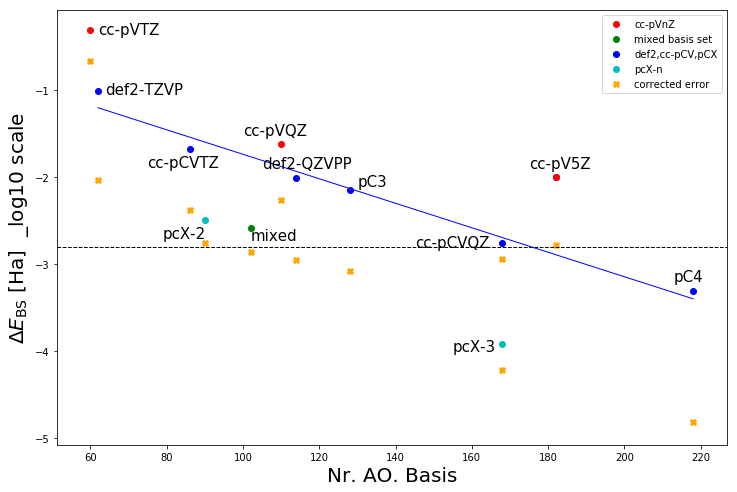

In [47]:
fig=plt.figure(figsize=(12,8))
plt.scatter([naoArr[0],naoArr[4]],eMAEpv,marker='o',color="red",label="cc-pVnZ")
plt.scatter(naoArr[1:3],eMAE[1:3],marker='o',color="blue")
plt.scatter(naoArr[3],eMAE[3],marker='o',color="green",label="mixed basis set")
plt.scatter(naoArr[5:],eMAE[5:],marker='o',color="blue",label="def2,cc-pCV,pCX")
plt.scatter(naoArr[8],eMAE[8],marker='o',color="red")
plt.scatter(pcxdf.nAO,np.log10(pcxdf.energy_MAE),label="pcX-n",color="c")
plt.scatter(pcxdf.nAO,np.log10(pcxdf.eMAE_corr),marker='X',color="orange",label=None)
plt.scatter(df.nAO,np.log10(ceMAE),marker='X',color="orange",label="corrected error")

#plt.plot(df.nAO,np.log10(ceMAE),color="orange")
plt.axhline(np.log10(1/hartree2kcal),color="black",lw=1,ls='--')
plt.plot(x, m*x + b,lw=1,color="blue")


#texts
plt.text(62,-.35,"cc-pVTZ",fontsize=15)
plt.text(64,-1.05,"def2-TZVP",fontsize=15)
plt.text(75,-1.88,"cc-pCVTZ",fontsize=15)
plt.text(100,-1.52,"cc-pVQZ",fontsize=15)
plt.text(79,-2.7,"pcX-2",fontsize=15)
plt.text(102,-2.72,"mixed",fontsize=15)
plt.text(105,-1.9,"def2-QZVPP",fontsize=15)
plt.text(130,-2.1,"pC3",fontsize=15)
plt.text(145,-2.8,"cc-pCVQZ",fontsize=15)
plt.text(155,-4.,"pcX-3",fontsize=15)
plt.text(175,-1.9,"cc-pV5Z",fontsize=15)
plt.text(213,-3.2,"pC4",fontsize=15)

plt.legend()
plt.xlabel("Nr. AO. Basis",size=20)
plt.ylabel("$\Delta E_{\mathrm{BS}}$ [Ha]  _log10 scale",size=20)
plt.savefig("scatter_ee.jpg")

In [20]:
pcxdf

,BF@COe,BF@COm,BFe,BFm,CO@BFe,CO@BFm,CO@NNe,CO@NNm,COe,COm,NN@COe,NN@COm,NNe,NNm,basis set,nAO,energy_MAE,rad_MAE,eMAE_corr
0,-124.156580,2.35483,-124.162432,2.35348,-112.785317,2.08324,-112.781076,2.08391,-112.786616,2.08272,-108.989017,2.01382,-108.989064,2.01389,pcX-2,90,0.003184,0.000783,0.001749
1,-124.168734,2.35201,-124.168895,2.35193,-112.792393,2.08230,-112.792287,2.08224,-112.792491,2.08218,-108.996335,2.01342,-108.996354,2.01335,pcX-3,168,0.000120,0.000083,0.000060


In [21]:
rMAE=np.log10(np.asarray(df.rad_MAE))

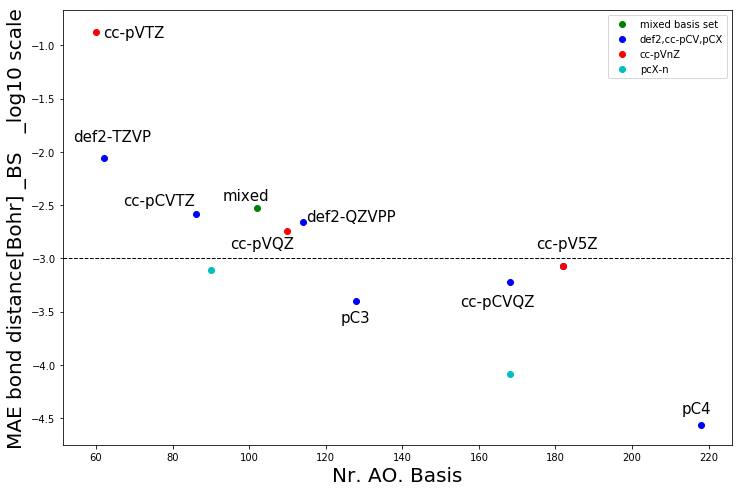

In [54]:
fig=plt.figure(figsize=(12,8))
#plt.plot(df.nAO,np.log(df.rad_MAE*1000))  # mBohrs as length units
plt.scatter(naoArr[1:3],rMAE[1:3],marker='o',color="blue")
plt.scatter(naoArr[3],rMAE[3],marker='o',color="green",label="mixed basis set")
plt.scatter(naoArr[5:],rMAE[5:],marker='o',color="blue",label="def2,cc-pCV,pCX")
plt.scatter([naoArr[0],naoArr[4],naoArr[8]],[rMAE[0],rMAE[4],rMAE[8]],marker='o',color="red",label="cc-pVnZ")
plt.scatter(pcxdf.nAO,np.log10(pcxdf.rad_MAE),color="c",label="pcX-n")
#plt.scatter(df.nAO,np.log10(df.rad_MAE*1000),marker='X',color="red
plt.ylabel("MAE bond distance[Bohr] _BS   _log10 scale",size=20)
plt.xlabel("Nr. AO. Basis",size=20)
plt.legend()
plt.axhline(-3,color="black",lw=1,ls='--')

#texts
plt.text(62,-.92,"cc-pVTZ",fontsize=15)
plt.text(54,-1.9,"def2-TZVP",fontsize=15)
plt.text(67,-2.5,"cc-pCVTZ",fontsize=15)

plt.text(93,-2.45,"mixed",fontsize=15)
plt.text(95,-2.9,"cc-pVQZ",fontsize=15)
plt.text(115,-2.65,"def2-QZVPP",fontsize=15)
plt.text(124,-3.6,"pC3",fontsize=15)
plt.text(155,-3.45,"cc-pCVQZ",fontsize=15)
plt.text(175,-2.9,"cc-pV5Z",fontsize=15)
plt.text(213,-4.45,"pC4",fontsize=15)
plt.savefig("MAE_bond_BS.jpg")